In [ ]:
import os, shutil
original_dataset_dir = '/content/drive/My Drive/Colab Notebooks/Kaggle/original_data/train'
base_dir = "/content/drive/My Drive/Colab Notebooks/Kaggle/cat_and_dogs_small"

# Cat and Dog Classification With CNN

* In this project, data is obtained from a Kaggle competition in 2013. You can find the original dataset via following [link](https://www.kaggle.com/c/dogs-vs-cats/overview). 

* Dataset contains 25000 labeled cats and dogs images (12.500 for each class). However, we will be using only 4000 of them as 2000 for training, 1000 for validation, and 1000 for the test dataset.

### In this notebook, we are going to cover:

* Fetching data directly from the directory
* Image augmentation in the case that we don't have sufficient data
* Using CNN to evaluate Cat and Dog Classification
* Using the VGG16 model for transfer learning
* Extracting features from convolutional layers of the VGG16 model
* Fine-tuning

`original_dataset_dir` = path to original dataset directory in your computer

`base_dir` = path to where 4000 data will be moved

# Creating Directories and Moving Dataset Into Them

In [ ]:
train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
# os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
# os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
# os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(test_dogs_dir)

We have created 3 directories to separate train, validation, and test datasets. Then, class directories, which cats and dogs, were created within these 3 directories.

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

### Exploring Dataset



In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [ ]:
from keras.preprocessing import image
from matplotlib import pyplot as plt

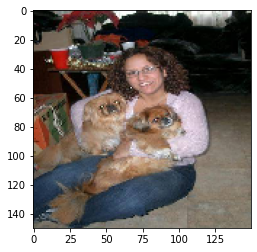

In [ ]:
# Choosing image
fnames = [os.path.join(train_dogs_dir, fname) for fname in os.listdir(train_dogs_dir)]
img_path = fnames[5]

# Loading image
img = image.load_img(img_path, target_size=(150, 150))
plt.imshow(img)

Images in this dataset not only include cats and dogs but also have some objects like toys, humans, etc. as shown above.

Since we will use images with 150x150 resolution, each image will be resized while loading.

In [ ]:
# Converting it to array
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
x.shape

(1, 150, 150, 3)

### Building Our Network

In [ ]:
from keras import layers, models

Let's start with creating CNN blocks with doubling the size of the filters in each step, but downsizing the pixels half with MaxPooling. Therefore, we will catch more patterns while decreasing the input size of Densely connected layers.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

RMSprop is chosen as an optimizer with a $10^{-4}$ learning rate.

In [ ]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

Luckily, Keras already have the `ImageDataGenerator` class for data augmentation and fetching data directly from the directory. 

In ImageDataGenerator class we have following parameters:

* `rescale` = in order to downsize each pixel by 1./255 ratio
* `rotation_range` = determines how many degree would you like to rotate image during augmentation
* `width_shift_range` = shifting images horizontally
* `height_shift_range` = shifting images vertically
* `shear_range` = cropping rate
* `zoom_range` = zooming different part of the image
* `horizontal_flip` = horizotally flipping image like mirror effect
* `fill_mode` = filling the rest of the pixels after cropping, shiftting etc. image

For more details, please look at the `tensorflow.keras` documentary via the following [link](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Although we augmented the training images above, we should never augment test data.

### Displaying some randomly augmented training images

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode = 'nearest'
)

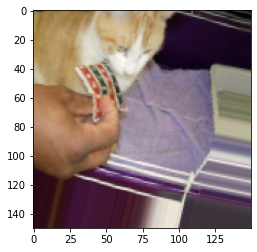

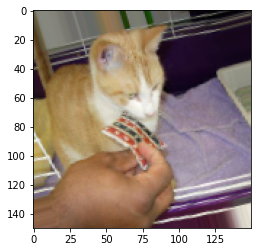

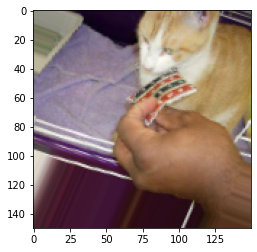

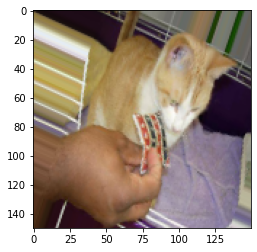

In [ ]:
from keras.preprocessing import image

# Choosing image
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]

# Loading image
img = image.load_img(img_path, target_size=(150, 150))

# Converting it to array
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x, batch_size=32):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i == 4:
    break

plt.show()

Since we have different amounts of samples for training and validation data as 2000 and 1000 respectively, we have to specify `steps_per_epoch` and `validation_steps` parameters based on the batch size we set in the generator. That stops validation steps after the model sees all validation data. Otherwise, the generator will continue the process within an infinite loop.

Example: 
* batch_size * steps_per_epoch -> 20 x 100 = 2000
* batch_size * validation_steps -> 20 x 50 = 1000

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50,
)

Epoch 1/20
100/100 [==============================] - 20s 198ms/step - loss: 0.6945 - acc: 0.5105 - val_loss: 0.7031 - val_acc: 0.5000
Epoch 2/20
100/100 [==============================] - 20s 201ms/step - loss: 0.6919 - acc: 0.5190 - val_loss: 0.6731 - val_acc: 0.5660
Epoch 3/20
100/100 [==============================] - 20s 201ms/step - loss: 0.6834 - acc: 0.5630 - val_loss: 0.6799 - val_acc: 0.5270
Epoch 4/20
100/100 [==============================] - 20s 199ms/step - loss: 0.6718 - acc: 0.5795 - val_loss: 0.6489 - val_acc: 0.6100
Epoch 5/20
100/100 [==============================] - 20s 199ms/step - loss: 0.6599 - acc: 0.6065 - val_loss: 0.6337 - val_acc: 0.6210
Epoch 6/20
100/100 [==============================] - 20s 198ms/step - loss: 0.6429 - acc: 0.6270 - val_loss: 0.6671 - val_acc: 0.6050
Epoch 7/20
100/100 [==============================] - 20s 201ms/step - loss: 0.6267 - acc: 0.6485 - val_loss: 0.6016 - val_acc: 0.6560
Epoch 8/20
100/100 [==============================] - 2

We can save and load models, as shown below. Generally, hdf5 files are preferred for their memory efficiency.


In [ ]:
model.save('cats_and_dogs_small_model.h5')

In [ ]:
from keras.models import load_model

model = load_model('cats_and_dogs_small_model.h5')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 15, 15, 128)      

As a first step, we got almost 70% accuracy in the test case.

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

model.evaluate(
    test_generator,
    steps=50)

Found 1000 images belonging to 2 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.6142873764038086, 0.6940000057220459]

### Using Pretrained VGG16 ConvNet For Transfer Learning

Now, we are going to import the VGG16 model trained by the `imagenet` dataset. However, as setting include_top parameter to False we won't include the densely connected layers in it since we want to use different input sizes from the `imagenet` dataset.

In [ ]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150,150,3))

58892288/58889256 [==============================] - 1s 0us/step


Here is the convolutional part of the VGG16 model

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

### Feature extraction

In feature extraction, we just forward propagate the dataset inside the VGG16 model and extract the output of the last convnet block for further usage.

In [ ]:
def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(
      directory,
      target_size=(150, 150),
      batch_size=batch_size,
      class_mode='binary')
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i+1) * batch_size] = features_batch
    labels[i * batch_size : (i+1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      break
  return features, labels

In [ ]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Pre-process the extracted features for Dense layers

Since densely connected layers required flat data (samples, features), we should reshape the outputs of convolutional layers to the required format.

In [ ]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [ ]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 0s 5ms/step - loss: 0.6029 - acc: 0.6595 - val_loss: 0.4308 - val_acc: 0.8450
Epoch 2/30
100/100 [==============================] - 0s 4ms/step - loss: 0.4234 - acc: 0.8085 - val_loss: 0.3621 - val_acc: 0.8520
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3608 - acc: 0.8425 - val_loss: 0.3150 - val_acc: 0.8830
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3084 - acc: 0.8740 - val_loss: 0.2979 - val_acc: 0.8840
Epoch 5/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2843 - acc: 0.8800 - val_loss: 0.2805 - val_acc: 0.8870
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2592 - acc: 0.8980 - val_loss: 0.2731 - val_acc: 0.8860
Epoch 7/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2483 - acc: 0.9045 - val_loss: 0.2612 - val_acc: 0.8980
Epoch 8/30
100/100 [==============================] - 0s 4ms/step - loss: 0.

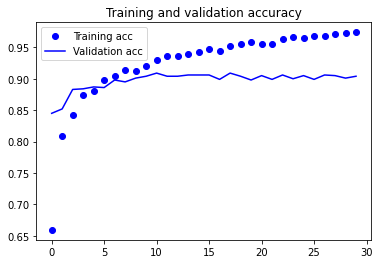

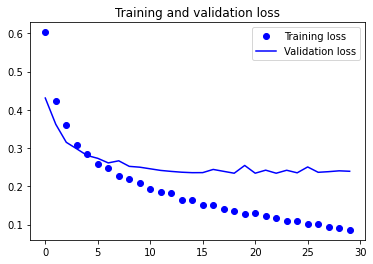

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 2. Way of Transfer Learning:

Models consist of layers, that's why we can act them as layers inside another model. In the following case, we are using the convolutional base of the VGG16 model as a group of layers inside our new model.

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


Since we don't want to change the weights in the convolutional part, we can freeze the layers by setting the `trainable` parameter as False.

In [ ]:
conv_base.trainable = False

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 - 22s - loss: 0.5879 - acc: 0.6970 - val_loss: 0.4567 - val_acc: 0.8110
Epoch 2/30
100/100 - 21s - loss: 0.4848 - acc: 0.7805 - val_loss: 0.3623 - val_acc: 0.8690
Epoch 3/30
100/100 - 21s - loss: 0.4396 - acc: 0.8025 - val_loss: 0.3248 - val_acc: 0.8880
Epoch 4/30
100/100 - 22s - loss: 0.4084 - acc: 0.8265 - val_loss: 0.3074 - val_acc: 0.8800
Epoch 5/30
100/100 - 21s - loss: 0.3801 - acc: 0.8345 - val_loss: 0.2940 - val_acc: 0.8870
Epoch 6/30
100/100 - 21s - loss: 0.3642 - acc: 0.8455 - val_loss: 0.3048 - val_acc: 0.8660
Epoch 7/30
100/100 - 21s - loss: 0.3562 - acc: 0.8465 - val_loss: 0.2757 - val_acc: 0.8930
Epoch 8/30
100/100 - 21s - loss: 0.3614 - acc: 0.8485 - val_loss: 0.2651 - val_acc: 0.8940
Epoch 9/30
100/100 - 21s - loss: 0.3418 - acc: 0.8505 - val_loss: 0.2704 - val_acc: 0.8860
Epoch 10/30
100/100 -

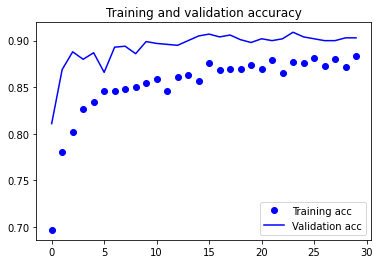

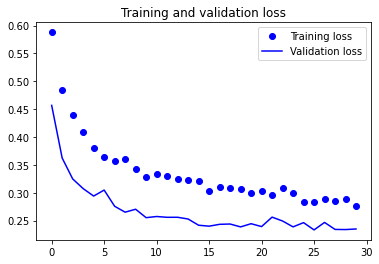

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Now, we got the same validation accuracy as 90%, but our model is more robust than feature extraction. Although we do not train the convolutional part, weights of densely connected layers are shaped differently since data is passing through inside convolutional layers in each epoch.

### Fine Tuning

In the previous case, we only trained the Dense layers. But, what if we want to train some part of the convolutional layers to catch more patterns about our dataset.

Since `conv_base` consists of layers, we can partially freeze them. In this particular case, we only allow the last convolutional block to train, which is start with the `block5_conv1` layer.

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    layer.trainable = set_trainable

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(216, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 216)               1769688   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 217       
Total params: 16,484,593
Trainable params: 8,849,329
Non-trainable params: 7,635,264
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 23s 225ms/step - loss: 0.5652 - acc: 0.7100 - val_loss: 0.3508 - val_acc: 0.8670
Epoch 2/30
100/100 [==============================] - 22s 223ms/step - loss: 0.3862 - acc: 0.8305 - val_loss: 0.2614 - val_acc: 0.8910
Epoch 3/30
100/100 [==============================] - 23s 226ms/step - loss: 0.3428 - acc: 0.8520 - val_loss: 0.2360 - val_acc: 0.9000
Epoch 4/30
100/100 [==============================] - 22s 224ms/step - loss: 0.3032 - acc: 0.8650 - val_loss: 0.2162 - val_acc: 0.9120
Epoch 5/30
100/100 [==============================] - 22s 222ms/step - loss: 0.2826 - acc: 0.8795 - val_loss: 0.2013 - val_acc: 0.9150
Epoch 6/30
100/100 [==============================] - 22s 223ms/step - loss: 0.2706 - acc: 0.8885 - val_loss: 0.2002 - val_acc: 0.9160
Epoch 7/30
100/100 [==============================] - 23s 226ms/step - loss: 0.2346 - acc: 0.8960 - val_loss: 0.2259 - val_acc: 0.9060
Epoch 8/30
100/100 [==============================] - 2

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.9340000152587891


In the end, we got 93% accuracy, including only 4000 samples of the entire dataset.